# 测试方案概述
我做了一个grid search，之前没有做这么详细的grid search。
但是，如果是全量版本，需要10个小时，所以我跑了精简版。

```
# 方案1：全量版：python -m dingtou.pyramid_v2.research2 -c 510310,510500,159915,588090 -y 1,2,3,4,5 -s 20130101 -e 20230101 -cs 16
# 预估时间：500 x 73 秒 = 36500 秒 = 10小时
native_quantiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
positive_quantiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
quantiles = list(itertools.product(*[native_quantiles,positive_quantiles]))
MAs = [240, 480, 850, -240, -480]
```


方案3：精简版，正负阈值少一些，MA少一些，3x16 = 48
预估时间：73秒 x 48 = 3504 秒 = 1小时

python -m dingtou.pyramid_v2.research2 -c 510310,510500,159915,588090 -y 1,2,3,4,5 -s 20130101 -e 20230101 -cs 16

native_quantiles = [0.2,0.3,0.4,0.5]
positive_quantiles = [0.5,0.6,0.7,0.8]
quantiles = list(itertools.product(*[native_quantiles,positive_quantiles]))
MAs = [240, 480, 850]


精简版：
    quantiles = 4x4 = 16
    mas = 3
    合计：3x16 = 48
    按照2013~2023，,1、2、3、4、5年，4只基金一次回测： 100 s
    合计：48x100 = 4800 s
    16核一起跑：4800/3600 =1小时20分钟
    python -m dingtou.pyramid_v2.research2 \
        -c 510310,510500,159915,588090 \
        -s 20130101 -e 20230101 \
        -r 3 \
        -cs 16 \
        -y 1,2,3,4,5 
    实际跑下来： 耗时: 1:08:28.255865

In [1]:
import pandas as pd

# 加载quantiles + mas，一共48个组合的参数的结果
df = pd.read_csv("../debug/510310,510500,159915,588090_20130101_20230101_1,2,3,4,5_3_quantiles.csv")

df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益"]]
plus = df1[df['组合收益']>0]
minus = df1[df['组合收益']<0]
good = df1[df['组合收益']>df['基金收益']]
bad = df1[df['组合收益']<df['基金收益']]

print(f"一共测试了{len(df1)}个场景")
print(f"平均年化：{df['组合年化'].mean()}")
print(f"年化方差：{df['组合年化'].std()}")
print(f"最大年化：{df['组合年化'].max()}")
print(f"最小年化：{df['组合年化'].min()}")
print(f"负收益比例：{len(minus)/len(df1)}")
print(f"强于基金比例：{len(good)/len(df1)}")
print("比基金差的情况：")
print(bad)
print("年化为负的情况：")
print(minus)


一共测试了22416个场景
平均年化：0.08825751757965555
年化方差：0.09205131995690427
最大年化：0.4644293683244072
最小年化：-0.0978244646454374
负收益比例：0.16287473233404712
强于基金比例：0.5814596716630978
比基金差的情况：
         基金代码      投资起始      投资结束      组合年化      组合收益      基准收益      基金收益
2      159915  20130104  20131231  0.092226  0.092226 -0.070713  0.808324
6      510310  20200102  20201231  0.209947  0.209947  0.125720  0.288177
7      510500  20200102  20201231  0.209947  0.209947  0.125720  0.213313
8      159915  20200102  20201231  0.209947  0.209947  0.125720  0.625334
13     510310  20130104  20141231  0.094217  0.197310  0.420592  0.429600
...       ...       ...       ...       ...       ...       ...       ...
22399  510500  20130402  20180330  0.041665  0.226423  0.422472  0.883944
22400  159915  20130402  20180330  0.041665  0.226423  0.422472  1.125078
22405  510310  20130702  20180630  0.002546  0.012793  0.419055  0.714530
22406  510500  20130702  20180630  0.002546  0.012793  0.419055  0.645497
22407  15991

(array([ 148.,  221.,  493.,  872., 1610., 1062., 1751., 2656., 2293.,
        1893., 1742., 1401., 1301., 1071.,  798.,  565.,  519.,  524.,
         373.,  211.,  138.,   89.,  151.,  108.,  179.,   87.,   77.,
          42.,   29.,   12.]),
 array([-0.09782446, -0.07908267, -0.06034088, -0.04159908, -0.02285729,
        -0.00411549,  0.0146263 ,  0.0333681 ,  0.05210989,  0.07085169,
         0.08959348,  0.10833527,  0.12707707,  0.14581886,  0.16456066,
         0.18330245,  0.20204425,  0.22078604,  0.23952784,  0.25826963,
         0.27701142,  0.29575322,  0.31449501,  0.33323681,  0.3519786 ,
         0.3707204 ,  0.38946219,  0.40820399,  0.42694578,  0.44568757,
         0.46442937]),
 <a list of 30 Patch objects>)

/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


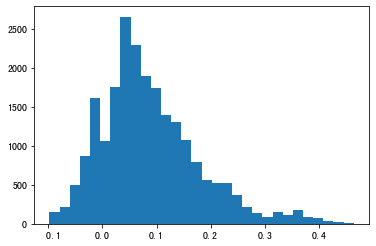

In [2]:
import matplotlib.pyplot as plt
plt.hist(df1['组合年化'],bins=30)

# 看看不同参数(quantiles+ma)的情况

看看那种组合，收益率最高，还有方差
还要看看，48个组和，各自的分布

Index(['Unnamed: 0', '基金代码', '基准指数', '投资起始', '投资结束', '定投起始', '定投结束', '期初资金',
       '期末现金', '期末持仓', '期末总值', '组合盈利', '组合收益', '组合年化', '基准收益', '基准年化', '基金收益',
       '基金年化', '夏普比率', '索提诺比率', '卡玛比率', '最大回撤', '买次', '卖次', '成本', '持仓', '现价',
       '佣金', '借钱总额', '借钱次数', '负收益分位数', '正收益分位数', '移动均值', 'year'],
      dtype='object')
df1 len: 22416
df2 len: 48
按照年化收益率排序：
Index(['基金代码', '投资起始', '投资结束', '组合年化', '组合收益', '基准收益', '基金收益'], dtype='object')
重置了索引：
Index(['负收益分位数', '正收益分位数', '移动均值', '基金代码', '投资起始', '投资结束', '组合年化', '组合收益',
       '基准收益', '基金收益'],
      dtype='object')
最好的投资方案：
     负收益分位数  正收益分位数  移动均值      组合年化
35     0.4     0.8   850  0.118682
23     0.3     0.8   850  0.117341
32     0.4     0.7   850  0.116728
47     0.5     0.8   850  0.116273
11     0.2     0.8   850  0.114326
20     0.3     0.7   850  0.113444
44     0.5     0.7   850  0.110643
8      0.2     0.7   850  0.110101
29     0.4     0.6   850  0.107068
17     0.3     0.6   850  0.104168
41     0.5     0.6   850  0.103213
5 

/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


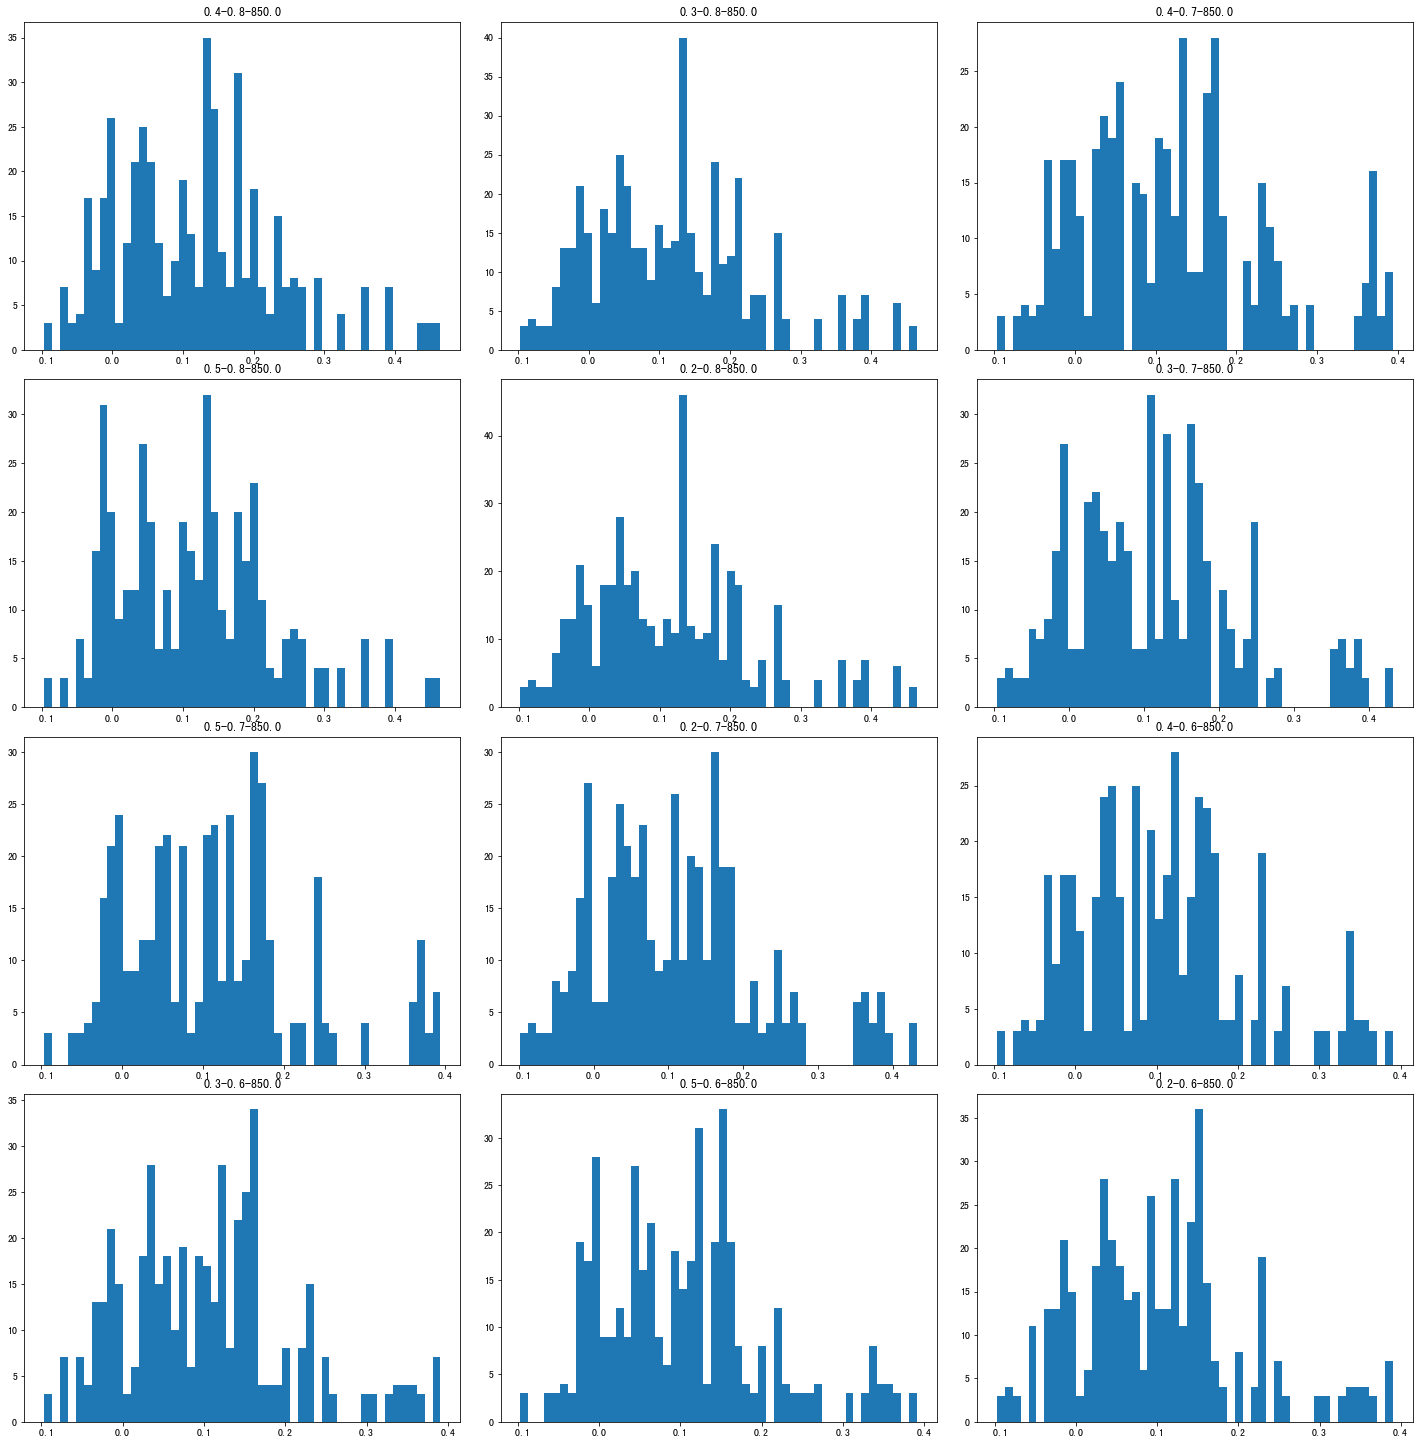

In [154]:
print(df.columns)
df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益",'负收益分位数', '正收益分位数', '移动均值']]
print("df1 len:",len(df1))

# 不同基金代码，组合年化是一样的，原因是不是投一只，而是投多只
df2 = df1.groupby(by=['负收益分位数', '正收益分位数', '移动均值']).mean()
print("df2 len:",len(df2))
print("按照年化收益率排序：")
print(df2.columns)
df3 = df2.reset_index()
print("重置了索引：")
print(df3.columns)
df4 = df3[['负收益分位数', '正收益分位数', '移动均值', '组合年化', '组合收益','基准收益', '基金收益']]
df5 = df4.sort_values(by='组合年化',ascending=False)


# 得到排位置靠前的12个，画出其分布，前12个收益率大于10%
df6 = df5.iloc[:12][['负收益分位数','正收益分位数','移动均值','组合年化']]
print("最好的投资方案：\n",df6)


ROW=4
COL=3
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=ROW, ncols=COL, figsize=(20,20))
fig.tight_layout()#调整整体空白
# 画所有的：
#for name,dg in df1.groupby(by=['负收益分位数', '正收益分位数', '移动均值']):
# 画top10年化收益的：
counter = 0
for _,s1 in df6.iterrows():
    df7 = df1[(df1['负收益分位数']==s1['负收益分位数']) &
              (df1['正收益分位数']==s1['正收益分位数']) &
              (df1['移动均值']==s1['移动均值'])
             ]
    s = df7['组合年化']
    i = counter // COL
    j = counter % COL
    axes[i,j].hist(s, bins=50)
    axes[i,j].set_title(f"{s1['负收益分位数']}-{s1['正收益分位数']}-{s1['移动均值']}")
    counter+=1 





# 看看，不同投资年份的分布

按照年分组均值/方差/最大/最小：
--------------------------------------------------------------------------------
          组合年化      组合收益      基准收益      基金收益    负收益分位数  正收益分位数        移动均值
year                                                                      
1.0   0.120333  0.120333  0.053679  0.085967  0.343906    0.65  501.937500
2.0   0.097823  0.214779  0.145994  0.244067  0.348339    0.65  514.303797
3.0   0.078320  0.270663  0.138230  0.295531  0.350000    0.65  523.333333
4.0   0.070113  0.330225  0.148041  0.297548  0.350000    0.65  523.333333
5.0   0.061919  0.370902  0.130879  0.289074  0.350000    0.65  523.333333
          组合年化      组合收益      基准收益      基金收益    负收益分位数    正收益分位数        移动均值
year                                                                        
1.0   0.133025  0.133025  0.242692  0.296827  0.110169  0.111814  248.949494
2.0   0.097807  0.220341  0.285670  0.460948  0.111519  0.111814  249.051514
3.0   0.071757  0.259371  0.246152  0.497310  0.111815  0.111815  25

/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


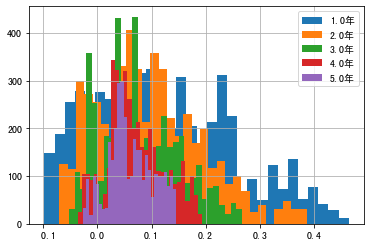

In [155]:
# 靠忘了记录投资窗口年限了，只能自己再算一遍
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
def d(s):
    return pd.to_datetime(s, format='%Y%m%d')
periods = d(df['投资结束'].apply(str)) - d(df['投资起始'].apply(str))
p1 = periods / pd.Timedelta('365 days')
df['year'] = p1.apply(np.round)
df

# 可以按照年来分组了
df1 = df[["year", "组合年化","组合收益","基准收益", "基金收益",'负收益分位数', '正收益分位数', '移动均值']]
print("按照年分组均值/方差/最大/最小：")
print("-"*80)
print(df1.groupby(by=['year']).mean())
print(df1.groupby(by=['year']).std())
print(df1.groupby(by=['year']).max())
print(df1.groupby(by=['year']).min())

import matplotlib.pyplot as plt
for name,dg in df1.groupby(by=['year']):
    s = dg['组合年化']
    s._name = f"{name}年"
    s.hist(bins=30,legend="True")

# 看最优的[0.4,0.8,850]的情况

平均收益：


,组合年化,组合收益,基准收益,基金收益,负收益分位数,正收益分位数,移动均值
year,,,,,,,
1.0,0.151901,0.151901,0.082380,0.115538,0.4,0.8,850.0
2.0,0.129498,0.290919,0.155987,0.254709,0.4,0.8,850.0
3.0,0.109553,0.394514,0.138230,0.295531,0.4,0.8,850.0
4.0,0.103544,0.515356,0.148041,0.297548,0.4,0.8,850.0
5.0,0.088118,0.563585,0.130879,0.289074,0.4,0.8,850.0


标准差：


,组合年化,组合收益,基准收益,基金收益,负收益分位数,正收益分位数,移动均值
year,,,,,,,
1.0,0.162019,0.162019,0.266021,0.318429,0.0,0.0,0.0
2.0,0.123715,0.285253,0.289119,0.471706,0.0,0.0,0.0
3.0,0.092911,0.348917,0.247405,0.499840,0.0,0.0,0.0
4.0,0.067224,0.355600,0.236902,0.414491,0.0,0.0,0.0
5.0,0.055507,0.372706,0.211460,0.363852,0.0,0.0,0.0


最好收益：


,组合年化,组合收益,基准收益,基金收益,负收益分位数,正收益分位数,移动均值
year,,,,,,,
1.0,0.464429,0.464429,1.076908,1.244472,0.4,0.8,850
2.0,0.388101,0.926823,1.131619,1.662808,0.4,0.8,850
3.0,0.263278,1.016029,0.565096,2.600346,0.4,0.8,850
4.0,0.193056,1.026016,0.590995,1.661603,0.4,0.8,850
5.0,0.144561,0.964242,0.501105,1.378041,0.4,0.8,850


最差收益：


,组合年化,组合收益,基准收益,基金收益,负收益分位数,正收益分位数,移动均值
year,,,,,,,
1.0,-0.096568,-0.096568,-0.255181,-0.331391,0.4,0.8,850
2.0,-0.053553,-0.104238,-0.204733,-0.364394,0.4,0.8,850
3.0,-0.036028,-0.104238,-0.272275,-0.488590,0.4,0.8,850
4.0,-0.027145,-0.104238,-0.255669,-0.414160,0.4,0.8,850
5.0,-0.018578,-0.089502,-0.281116,-0.327500,0.4,0.8,850


/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


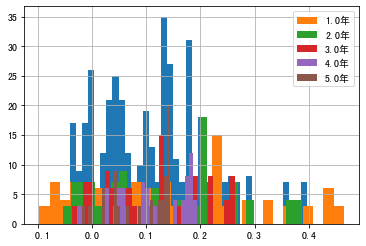

In [169]:
df2 = df1[(df1['负收益分位数']==0.4) &
              (df1['正收益分位数']==0.8) &
              (df1['移动均值']==850)]
print("平均收益：")
display(df2.groupby(by=['year']).mean())
print("标准差：")
display(df2.groupby(by=['year']).std())
print("最好收益：")
display(df2.groupby(by=['year']).max())
print("最差收益：")
display(df2.groupby(by=['year']).min())

import matplotlib.pyplot as plt
plt.hist(df2['组合年化'],bins=50)